Esse programa usa o "Dual Moving Average Crossover" para determinar quando comprar e vender ações. Nós usamos duas médias móveis, uma de curto prazo e uma de longo prazo, e então compramos quando a média móvel de curto prazo cruza acima da média móvel de longo prazo, e vendemos quando o oposto acontece.

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.style.use('fivethirtyeight')

In [2]:
# Pegar as informações da ação da Apple
aapl = yf.Ticker("AAPL")
# Pegar o histórico de preços da ação
hist = aapl.history(period="max")
# Mostrar os 5 primeiros registros
hist.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099584,0.100017,0.099584,0.099584,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094821,0.094821,0.094388,0.094388,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087893,0.087893,0.087461,0.087461,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089625,0.090058,0.089625,0.089625,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092224,0.092657,0.092224,0.092224,73449600,0.0,0.0


In [3]:
# Remover as colunas que não serão utilizadas
hist.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
# Mostrar apenas o ano, mês e dia no índice
hist.index = hist.index.strftime('%Y-%m-%d')
# Mostrar os 5 primeiros registros
hist.head()

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12,0.099584,0.100017,0.099584,0.099584,469033600
1980-12-15,0.094821,0.094821,0.094388,0.094388,175884800
1980-12-16,0.087893,0.087893,0.087461,0.087461,105728000
1980-12-17,0.089625,0.090058,0.089625,0.089625,86441600
1980-12-18,0.092224,0.092657,0.092224,0.092224,73449600


Visualizar os dados

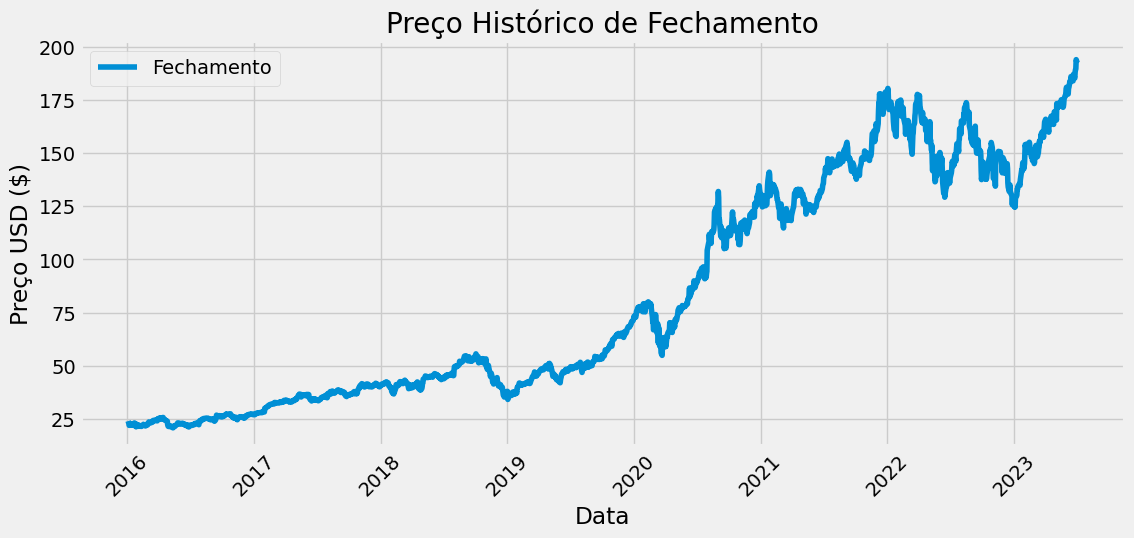

In [13]:
# Configurar o índice como DatetimeIndex
hist.index = pd.to_datetime(hist.index)

# Filtrar os dados a partir de 2006
hist_filtered = hist.loc['2016':]

# Visualizar os dados filtrados
plt.figure(figsize=(12, 5))
plt.plot(hist_filtered['Close'], label='Fechamento')
plt.title('Preço Histórico de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço USD ($)')
plt.legend(loc='upper left')

# Configurar formato de data para exibir apenas o ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Definir espaçamento das marcações do eixo x para exibir apenas uma marcação por ano
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.show()

In [14]:
# Criar uma média móvel simples de 30 dias
SMA30 = pd.DataFrame()
SMA30['Close'] = hist_filtered['Close'].rolling(window=30).mean()
SMA30

,Close
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2023-06-27,179.491667
2023-06-28,180.064334
2023-06-29,180.648333


In [15]:
# Criar uma média móvel simples de 100 dias
SMA100 = pd.DataFrame()
SMA100['Close'] = hist_filtered['Close'].rolling(window=100).mean()
SMA100

,Close
Date,
2016-01-04,NaN
2016-01-05,NaN
2016-01-06,NaN
2016-01-07,NaN
2016-01-08,NaN
...,...
2023-06-27,165.013383
2023-06-28,165.402063
2023-06-29,165.757449


Visualizar os dados

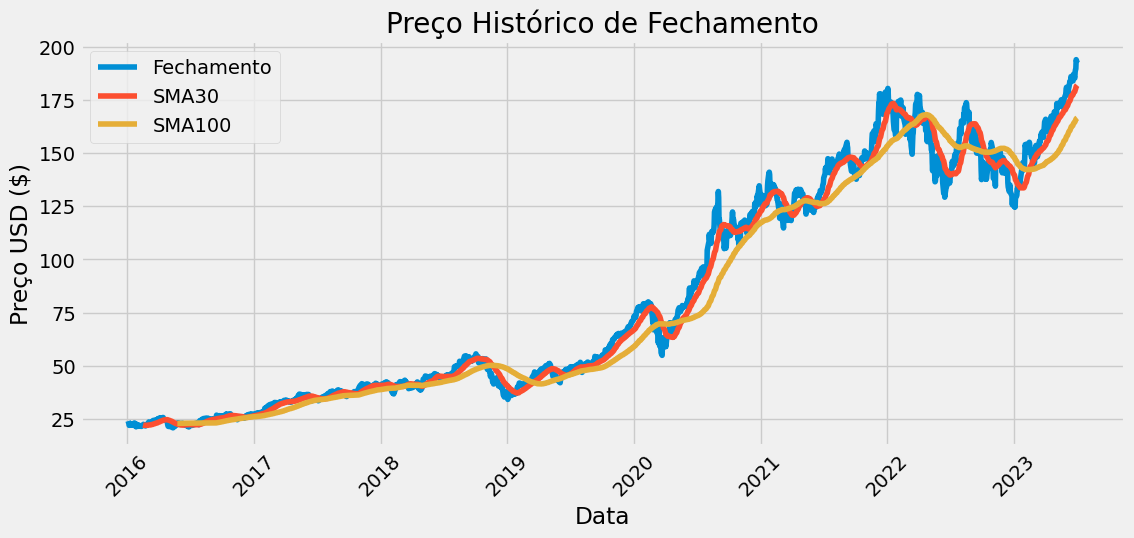

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(hist_filtered['Close'], label='Fechamento')
plt.plot(SMA30['Close'], label='SMA30')
plt.plot(SMA100['Close'], label='SMA100')
plt.title('Preço Histórico de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço USD ($)')
plt.legend(loc='upper left')

# Configurar formato de data para exibir apenas o ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Definir espaçamento das marcações do eixo x para exibir apenas uma marcação por ano
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.show()

In [20]:
# Criar um novo dataframe para armazenar todos os dados
df = pd.DataFrame()
df['hist'] = hist_filtered['Close']
df['SMA30'] = SMA30['Close']
df['SMA100'] = SMA100['Close']
df

,hist,SMA30,SMA100
Date,,,
2016-01-04,24.041487,NaN,NaN
2016-01-05,23.439026,NaN,NaN
2016-01-06,22.980330,NaN,NaN
2016-01-07,22.010454,NaN,NaN
2016-01-08,22.126839,NaN,NaN
...,...,...,...
2023-06-27,188.059998,179.491667,165.013383
2023-06-28,189.250000,180.064334,165.402063
2023-06-29,189.589996,180.648333,165.757449


In [21]:
# Criar uma função para sinalizar a compra e venda de ações
def compra_vende(df):
    sinalCompra = []
    sinalVenda = []
    flag = -1

    for i in range(len(df)):
        if df['SMA30'][i] > df['SMA100'][i]:
            if flag != 1:
                sinalCompra.append(df['hist'][i])
                sinalVenda.append(np.nan)
                flag = 1
            else:
                sinalCompra.append(np.nan)
                sinalVenda.append(np.nan)
        elif df['SMA30'][i] < df['SMA100'][i]:
            if flag != 0:
                sinalCompra.append(np.nan)
                sinalVenda.append(df['hist'][i])
                flag = 0
            else:
                sinalCompra.append(np.nan)
                sinalVenda.append(np.nan)
        else:
            sinalCompra.append(np.nan)
            sinalVenda.append(np.nan)

    return (sinalCompra, sinalVenda)

In [22]:
# Armazenar os sinais de compra e venda em variáveis
compra_vende = compra_vende(df)
df['SinalCompra'] = compra_vende[0]
df['SinalVenda'] = compra_vende[1]

In [23]:
# Visualizar os dados
df

,hist,SMA30,SMA100,SinalCompra,SinalVenda
Date,,,,,
2016-01-04,24.041487,NaN,NaN,NaN,NaN
2016-01-05,23.439026,NaN,NaN,NaN,NaN
2016-01-06,22.980330,NaN,NaN,NaN,NaN
2016-01-07,22.010454,NaN,NaN,NaN,NaN
2016-01-08,22.126839,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-27,188.059998,179.491667,165.013383,NaN,NaN
2023-06-28,189.250000,180.064334,165.402063,NaN,NaN
2023-06-29,189.589996,180.648333,165.757449,NaN,NaN


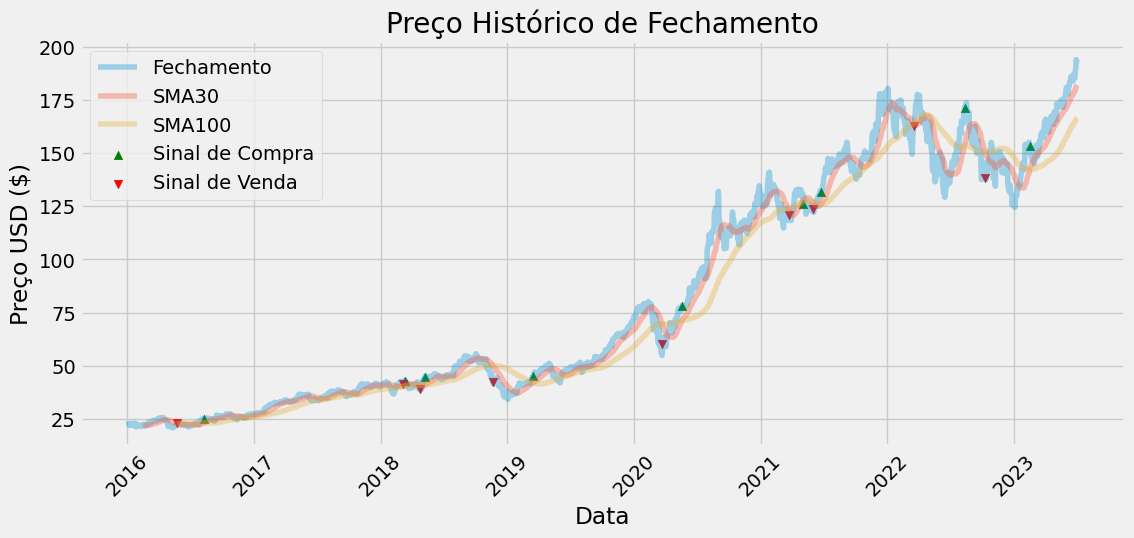

In [24]:
# Visualizar os dados e os sinais de compra e venda
plt.figure(figsize=(12, 5))
plt.plot(df['hist'], label='Fechamento', alpha=0.35)
plt.plot(df['SMA30'], label='SMA30', alpha=0.35)
plt.plot(df['SMA100'], label='SMA100', alpha=0.35)
plt.scatter(df.index, df['SinalCompra'], label='Sinal de Compra', marker='^', color='green')
plt.scatter(df.index, df['SinalVenda'], label='Sinal de Venda', marker='v', color='red')
plt.title('Preço Histórico de Fechamento')
plt.xlabel('Data')
plt.ylabel('Preço USD ($)')
plt.legend(loc='upper left')

# Configurar formato de data para exibir apenas o ano
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Definir espaçamento das marcações do eixo x para exibir apenas uma marcação por ano
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.xticks(rotation=45)
plt.show()